In [3]:
#!conda install -y linearmodels

In [1]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2023-03')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 159 entries, 2010-01 to 2023-03
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  159 non-null    float64
 1   SMB     159 non-null    float64
 2   HML     159 non-null    float64
 3   RMW     159 non-null    float64
 4   CMA     159 non-null    float64
 5   RF      159 non-null    float64
dtypes: float64(6)
memory usage: 8.7 KB


/var/folders/h0/fd2sjrqn69ncrtc29q0mnst00000gn/T/ipykernel_84529/3705831790.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2023-03')[0]
/var/folders/h0/fd2sjrqn69ncrtc29q0mnst00000gn/T/ipykernel_84529/3705831790.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2023-03')[0]


In [4]:
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.34,0.43,-1.27,0.46,0.00
2010-02,3.40,1.51,3.23,-0.27,1.43,0.00
2010-03,6.31,1.85,2.21,-0.65,1.69,0.01
2010-04,2.00,4.98,2.89,0.69,1.72,0.01
2010-05,-7.89,0.04,-2.44,1.30,-0.22,0.01
...,...,...,...,...,...,...
2022-11,4.60,-2.67,1.38,6.01,3.11,0.29
2022-12,-6.41,-0.16,1.32,0.09,4.19,0.33
2023-01,6.65,4.43,-4.05,-2.62,-4.53,0.35


In [5]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1.024465,-0.004906,-0.131321,0.268176,0.132516,0.050881
std,4.445316,2.607319,3.296048,1.940214,2.061946,0.082088
min,-13.390000,-8.300000,-13.950000,-4.780000,-6.920000,0.000000
25%,-1.540000,-1.805000,-1.890000,-1.095000,-1.225000,0.000000
50%,1.360000,0.140000,-0.420000,0.270000,0.000000,0.010000
75%,3.465000,1.605000,1.310000,1.300000,1.295000,0.080000
max,13.650000,7.120000,12.750000,7.220000,7.740000,0.360000


In [6]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2023-03')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 159 entries, 2010-01 to 2023-03
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    159 non-null    float64
 1   Mines   159 non-null    float64
 2   Oil     159 non-null    float64
 3   Clths   159 non-null    float64
 4   Durbl   159 non-null    float64
 5   Chems   159 non-null    float64
 6   Cnsum   159 non-null    float64
 7   Cnstr   159 non-null    float64
 8   Steel   159 non-null    float64
 9   FabPr   159 non-null    float64
 10  Machn   159 non-null    float64
 11  Cars    159 non-null    float64
 12  Trans   159 non-null    float64
 13  Utils   159 non-null    float64
 14  Rtail   159 non-null    float64
 15  Finan   159 non-null    float64
 16  Other   159 non-null    float64
dtypes: float64(17)
memory usage: 22.4 KB


/var/folders/h0/fd2sjrqn69ncrtc29q0mnst00000gn/T/ipykernel_84529/4236016398.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2023-03')[0]
/var/folders/h0/fd2sjrqn69ncrtc29q0mnst00000gn/T/ipykernel_84529/4236016398.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2023-03')[0]
/var/folders/h0/fd2sjrqn69ncrtc29q0mnst00000gn/T/ipykernel_84529/4236016398.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object

In [7]:
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,3.89,16.90,0.47,16.61,6.70,9.73,4.96,8.58,13.61,6.04,11.07,-7.67,8.23,6.53,2.39,4.46,3.93
2022-12,-3.47,-4.63,-4.36,-0.70,-5.30,-6.75,-1.11,-3.79,-7.96,-6.01,-6.91,-25.68,-4.22,-1.48,-9.78,-5.82,-6.73
2023-01,-2.21,14.55,2.43,9.14,12.85,10.81,-3.00,6.78,21.82,12.50,9.07,23.31,5.38,-1.61,11.79,6.11,7.78


In [8]:
ff_portfolio_data.describe()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.878113,0.508239,0.820818,1.185220,0.837673,0.884025,0.999937,1.466226,0.900063,1.228239,1.251447,1.666918,1.086667,0.778616,1.091572,0.991572,1.166918
std,3.521487,7.841212,8.186862,6.271476,6.222814,6.226986,3.515888,6.034419,9.122842,5.499916,5.665043,8.807171,5.494092,3.873577,4.790273,5.499902,4.606212
min,-10.350000,-24.380000,-34.820000,-19.510000,-16.900000,-18.840000,-7.840000,-20.410000,-22.330000,-17.970000,-13.650000,-25.680000,-22.780000,-13.140000,-12.490000,-20.140000,-11.520000
25%,-1.320000,-5.280000,-3.320000,-2.065000,-2.560000,-2.000000,-1.340000,-2.430000,-4.940000,-1.795000,-2.125000,-3.575000,-2.170000,-1.530000,-1.350000,-2.375000,-1.390000
50%,0.880000,-0.110000,0.980000,0.940000,1.160000,1.430000,1.140000,2.030000,0.740000,1.490000,2.090000,0.730000,1.200000,1.040000,0.870000,1.860000,1.680000
75%,3.335000,6.525000,4.730000,4.840000,4.410000,4.740000,3.470000,5.575000,5.955000,4.145000,4.705000,5.215000,4.485000,3.275000,3.710000,4.440000,4.010000
max,10.140000,21.940000,32.870000,17.190000,19.520000,19.120000,10.390000,17.990000,23.840000,17.660000,14.750000,38.710000,19.670000,10.350000,18.270000,16.390000,13.530000


In [9]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [10]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [11]:
dji = ek.get_data('0#.DJI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])[0]

In [12]:
const = dji['Instrument'].tolist()
const_limp = [i for i in const if i != '']
const

['GS.N',
 'NKE.N',
 'CSCO.OQ',
 'JPM.N',
 'DIS.N',
 'INTC.OQ',
 'DOW.N',
 'MRK.N',
 'CVX.N',
 'AXP.N',
 'VZ.N',
 'HD.N',
 'WBA.OQ',
 'MCD.N',
 'UNH.N',
 'KO.N',
 'JNJ.N',
 'MSFT.OQ',
 'HON.OQ',
 'CRM.N',
 'PG.N',
 'IBM.N',
 'MMM.N',
 'AAPL.OQ',
 'WMT.N',
 'CAT.N',
 'AMGN.OQ',
 'V.N',
 'TRV.N',
 'BA.N']

In [13]:
from datetime import datetime, timedelta
end = '2023-04-01 00:00:00.000000'
start = '2009-12-01 00:00:00.000000'
print(start, end)

2009-12-01 00:00:00.000000 2023-04-01 00:00:00.000000


In [33]:
meses = 159

In [34]:
df = ek.get_timeseries(const_limp[0], start_date = start, end_date = end, fields='CLOSE', interval="monthly")
df[const_limp[0]] = np.log(df['CLOSE'].div(df['CLOSE'].shift(1)))
weekly_returns = df.drop(['CLOSE'], axis=1).iloc[1:]
weekly_returns

GS.N,GS.N
Date,
2010-01-31,-0.126886
2010-02-28,0.050032
2010-03-31,0.0874
2010-04-30,-0.161385
2010-05-31,-0.006495
...,...
2022-11-30,0.114103
2022-12-31,-0.117388
2023-01-31,0.063276


In [35]:
for i in const_limp[1:]:
    w = ek.get_timeseries(i, start_date = start, end_date = end, fields='CLOSE', interval="monthly")
    w[i] = np.log(w['CLOSE'].div(w['CLOSE'].shift(1)))
    w1 = w.drop(['CLOSE'], axis=1).iloc[1:]
    p = round(w1.count()[0])
    print(i, p)
    if p == meses:    
        weekly_returns = weekly_returns.join(w1, lsuffix="_left", rsuffix="_right")

NKE.N 159
CSCO.OQ 159
JPM.N 159
DIS.N 159
INTC.OQ 159
DOW.N 48
MRK.N 159
CVX.N 159
AXP.N 159
VZ.N 159
HD.N 159
WBA.OQ 159
MCD.N 159
UNH.N 159
KO.N 159
JNJ.N 159
MSFT.OQ 159
HON.OQ 159
CRM.N 159
PG.N 159
IBM.N 159
MMM.N 159
AAPL.OQ 159
WMT.N 159
CAT.N 159
AMGN.OQ 159
V.N 159
TRV.N 159
BA.N 159


In [36]:
df2=weekly_returns.reset_index()
df2['Date'] = pd.to_datetime(df2['Date']).dt.to_period('M')
returns = df2.set_index('Date')
returns

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.126886,-0.035746,-0.06337,-0.067759,-0.087434,-0.050262,0.043904,-0.065344,-0.073197,-0.118765,...,0.01506,-0.067221,-0.026724,-0.093074,-0.000374,-0.087027,0.033206,-0.064097,0.016115,0.112906
2010-02,0.050032,0.058639,0.079529,0.074933,0.055616,0.056614,-0.034642,0.002493,0.013975,-0.016796,...,0.027719,0.038233,-0.004233,0.063034,0.011907,0.08808,-0.032499,0.038855,0.037192,0.041376
2010-03,0.0874,0.083677,0.06754,0.064136,0.111074,0.080904,0.012664,0.04767,0.07732,0.069753,...,-0.000158,0.008535,0.041785,0.138133,0.027904,0.096823,0.054151,0.065249,0.025346,0.139431
2010-04,-0.161385,0.032263,0.03362,-0.049707,0.053811,0.025284,-0.063843,0.071373,0.111353,-0.071137,...,-0.0177,0.005831,0.059237,0.105692,-0.035702,0.080079,-0.040989,-0.008827,-0.061158,-0.002482
2010-05,-0.006495,-0.047618,-0.150443,-0.073061,-0.09743,-0.06375,-0.039289,-0.09756,-0.145623,-0.048583,...,-0.017364,-0.029421,-0.111557,-0.015282,-0.059321,-0.113899,-0.102343,-0.219327,-0.025348,-0.120929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,0.114103,0.168506,0.090235,0.093228,-0.08488,0.056083,0.084472,0.013234,0.059749,0.04218,...,0.102192,0.073922,0.00143,-0.035243,0.068492,0.088162,0.057672,0.046406,0.028591,0.227303
2022-12,-0.117388,0.064601,-0.042735,-0.029971,-0.119112,-0.129028,0.007509,-0.021059,-0.064475,0.010717,...,0.015962,-0.055295,-0.049219,-0.130419,-0.072293,0.013236,-0.086605,-0.043514,-0.012298,0.062885
2023-01,0.063276,0.084523,0.02139,0.042771,0.22213,0.066948,-0.032426,-0.030949,0.168864,0.053613,...,-0.062482,-0.044707,-0.041197,0.104829,0.014563,0.051775,-0.039769,0.102608,0.019176,0.111692


In [40]:
ff_factor_data = ff_factor_data.loc[returns.index]
ff_portfolio_data = ff_portfolio_data.loc[returns.index]
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.34,0.43,-1.27,0.46,0.00
2010-02,3.40,1.51,3.23,-0.27,1.43,0.00
2010-03,6.31,1.85,2.21,-0.65,1.69,0.01
2010-04,2.00,4.98,2.89,0.69,1.72,0.01
2010-05,-7.89,0.04,-2.44,1.30,-0.22,0.01
...,...,...,...,...,...,...
2022-11,4.60,-2.67,1.38,6.01,3.11,0.29
2022-12,-6.41,-0.16,1.32,0.09,4.19,0.33
2023-01,6.65,4.43,-4.05,-2.62,-4.53,0.35


In [42]:
excess_returns = returns.sub(ff_factor_data.RF, axis=0)
excess_returns

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.126886,-0.035746,-0.06337,-0.067759,-0.087434,-0.050262,0.043904,-0.065344,-0.073197,-0.118765,...,0.01506,-0.067221,-0.026724,-0.093074,-0.000374,-0.087027,0.033206,-0.064097,0.016115,0.112906
2010-02,0.050032,0.058639,0.079529,0.074933,0.055616,0.056614,-0.034642,0.002493,0.013975,-0.016796,...,0.027719,0.038233,-0.004233,0.063034,0.011907,0.08808,-0.032499,0.038855,0.037192,0.041376
2010-03,0.0774,0.073677,0.05754,0.054136,0.101074,0.070904,0.002664,0.03767,0.06732,0.059753,...,-0.010158,-0.001465,0.031785,0.128133,0.017904,0.086823,0.044151,0.055249,0.015346,0.129431
2010-04,-0.171385,0.022263,0.02362,-0.059707,0.043811,0.015284,-0.073843,0.061373,0.101353,-0.081137,...,-0.0277,-0.004169,0.049237,0.095692,-0.045702,0.070079,-0.050989,-0.018827,-0.071158,-0.012482
2010-05,-0.016495,-0.057618,-0.160443,-0.083061,-0.10743,-0.07375,-0.049289,-0.10756,-0.155623,-0.058583,...,-0.027364,-0.039421,-0.121557,-0.025282,-0.069321,-0.123899,-0.112343,-0.229327,-0.035348,-0.130929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,-0.175897,-0.121494,-0.199765,-0.196772,-0.37488,-0.233917,-0.205528,-0.276766,-0.230251,-0.24782,...,-0.187808,-0.216078,-0.28857,-0.325243,-0.221508,-0.201838,-0.232328,-0.243594,-0.261409,-0.062697
2022-12,-0.447388,-0.265399,-0.372735,-0.359971,-0.449112,-0.459028,-0.322491,-0.351059,-0.394475,-0.319283,...,-0.314038,-0.385295,-0.379219,-0.460419,-0.402293,-0.316764,-0.416605,-0.373514,-0.342298,-0.267115
2023-01,-0.286724,-0.265477,-0.32861,-0.307229,-0.12787,-0.283052,-0.382426,-0.380949,-0.181136,-0.296387,...,-0.412482,-0.394707,-0.391197,-0.245171,-0.335437,-0.298225,-0.389769,-0.247392,-0.330824,-0.238308


In [43]:
excess_returns = excess_returns.clip(lower=np.percentile(excess_returns, 1),
                                     upper=np.percentile(excess_returns, 99))

In [45]:
excess_returns

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.126886,-0.035746,-0.06337,-0.067759,-0.087434,-0.050262,0.043904,-0.065344,-0.073197,-0.118765,...,0.01506,-0.067221,-0.026724,-0.093074,-0.000374,-0.087027,0.033206,-0.064097,0.016115,0.112906
2010-02,0.050032,0.058639,0.079529,0.074933,0.055616,0.056614,-0.034642,0.002493,0.013975,-0.016796,...,0.027719,0.038233,-0.004233,0.063034,0.011907,0.08808,-0.032499,0.038855,0.037192,0.041376
2010-03,0.0774,0.073677,0.05754,0.054136,0.101074,0.070904,0.002664,0.03767,0.06732,0.059753,...,-0.010158,-0.001465,0.031785,0.128133,0.017904,0.086823,0.044151,0.055249,0.015346,0.129431
2010-04,-0.171385,0.022263,0.02362,-0.059707,0.043811,0.015284,-0.073843,0.061373,0.101353,-0.081137,...,-0.0277,-0.004169,0.049237,0.095692,-0.045702,0.070079,-0.050989,-0.018827,-0.071158,-0.012482
2010-05,-0.016495,-0.057618,-0.160443,-0.083061,-0.10743,-0.07375,-0.049289,-0.10756,-0.155623,-0.058583,...,-0.027364,-0.039421,-0.121557,-0.025282,-0.069321,-0.123899,-0.112343,-0.229327,-0.035348,-0.130929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,-0.175897,-0.121494,-0.199765,-0.196772,-0.37488,-0.233917,-0.205528,-0.276766,-0.230251,-0.24782,...,-0.187808,-0.216078,-0.28857,-0.325243,-0.221508,-0.201838,-0.232328,-0.243594,-0.261409,-0.062697
2022-12,-0.384682,-0.265399,-0.372735,-0.359971,-0.384682,-0.384682,-0.322491,-0.351059,-0.384682,-0.319283,...,-0.314038,-0.384682,-0.379219,-0.384682,-0.384682,-0.316764,-0.384682,-0.373514,-0.342298,-0.267115
2023-01,-0.286724,-0.265477,-0.32861,-0.307229,-0.12787,-0.283052,-0.382426,-0.380949,-0.181136,-0.296387,...,-0.384682,-0.384682,-0.384682,-0.245171,-0.335437,-0.298225,-0.384682,-0.247392,-0.330824,-0.238308


In [44]:
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,3.89,16.90,0.47,16.61,6.70,9.73,4.96,8.58,13.61,6.04,11.07,-7.67,8.23,6.53,2.39,4.46,3.93
2022-12,-3.47,-4.63,-4.36,-0.70,-5.30,-6.75,-1.11,-3.79,-7.96,-6.01,-6.91,-25.68,-4.22,-1.48,-9.78,-5.82,-6.73
2023-01,-2.21,14.55,2.43,9.14,12.85,10.81,-3.00,6.78,21.82,12.50,9.07,23.31,5.38,-1.61,11.79,6.11,7.78


In [46]:
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 159 entries, 2010-01 to 2023-03
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  159 non-null    float64
 1   SMB     159 non-null    float64
 2   HML     159 non-null    float64
 3   RMW     159 non-null    float64
 4   CMA     159 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB


In [48]:
for industry in ff_portfolio_data:
    print(industry)

Food 
Mines
Oil  
Clths
Durbl
Chems
Cnsum
Cnstr
Steel
FabPr
Machn
Cars 
Trans
Utils
Rtail
Finan
Other


In [49]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry], 
                exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

In [50]:
betas = pd.DataFrame(betas, 
                     columns=ff_factor_data.columns, 
                     index=ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


In [51]:
betas

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.642030,-0.187742,-0.030374,0.403346,0.359677
Mines,1.156298,0.268225,0.079075,0.140469,0.578880
Oil,1.171238,0.326327,0.903016,-0.267982,0.451595
Clths,1.050236,0.382238,-0.158475,0.625370,-0.079673
Durbl,1.129524,0.522537,-0.187552,0.136403,0.037664
Chems,1.164889,0.223411,0.301997,0.104273,0.103011
Cnsum,0.666978,-0.194816,-0.316715,0.216285,0.671849
Cnstr,1.079533,0.310966,0.062796,0.455940,-0.023232
Steel,1.427880,0.642927,0.475693,0.377679,0.213393
FabPr,1.009091,0.412510,0.051358,0.182362,-0.119639


In [52]:
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,3.89,16.90,0.47,16.61,6.70,9.73,4.96,8.58,13.61,6.04,11.07,-7.67,8.23,6.53,2.39,4.46,3.93
2022-12,-3.47,-4.63,-4.36,-0.70,-5.30,-6.75,-1.11,-3.79,-7.96,-6.01,-6.91,-25.68,-4.22,-1.48,-9.78,-5.82,-6.73
2023-01,-2.21,14.55,2.43,9.14,12.85,10.81,-3.00,6.78,21.82,12.50,9.07,23.31,5.38,-1.61,11.79,6.11,7.78


In [53]:
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index], 
                exog=betas).fit()
    lambdas.append(step2.params)

In [54]:
lambdas = pd.DataFrame(lambdas, 
                       index=ff_portfolio_data.index,
                       columns=betas.columns.tolist())
lambdas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 159 entries, 2010-01 to 2023-03
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  159 non-null    float64
 1   SMB     159 non-null    float64
 2   HML     159 non-null    float64
 3   RMW     159 non-null    float64
 4   CMA     159 non-null    float64
dtypes: float64(5)
memory usage: 11.5 KB


In [55]:
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01,-2.524367,-3.137588,-2.224659,-2.041681,-5.398928
2010-02,3.810348,6.897814,-3.618651,-0.652858,1.278425
2010-03,6.244954,-1.487608,1.335294,5.500428,-3.546825
2010-04,2.551467,2.395143,-1.641416,0.969642,-4.402955
2010-05,-7.788623,5.299450,-2.842175,-0.648346,-0.145072
...,...,...,...,...,...
2022-11,3.184617,-0.505860,6.267920,17.808782,2.191436
2022-12,-8.344666,-2.904129,8.485659,11.881385,3.261766
2023-01,7.317378,17.621818,-8.105718,-6.971714,-3.029209


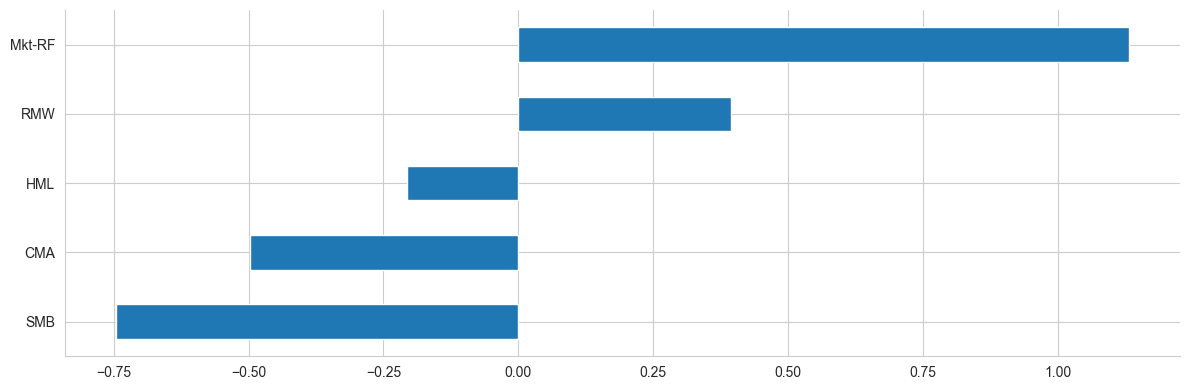

In [56]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout();

In [57]:
lambdas.mean().sort_values()

SMB      -0.746081
CMA      -0.496860
HML      -0.205506
RMW       0.393731
Mkt-RF    1.132649
dtype: float64

In [65]:
model = LinearFactorModel(portfolios=ff_portfolio_data, 
                          factors=ff_factor_data)
res = model.fit()

In [70]:
res.full_summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                      LinearFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                 17   R-squared:                      0.7091
No. Factors:                          5   J-statistic:                    9.3222
No. Observations:                   159   P-value                         0.6752
Date:                  Tue, May 23 2023   Distribution:                 chi2(12)
Time:                          01:17:43                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1326     0.3679     3.0785     0.0021      0.4115      1.8538
SMB           -0.7461     0.4662    -1.6003     0.1095     -1.6598      0.1677
HML           -0.2055     0.4462    -0.4606     0.6451     -1.0800      0.6690
RMW            0.3937     0.5715     0.6889     0.4909     -0.7264      1.5139
CMA           -0.4969     0.4044    -1.2287     0.2192     -1.2894      0.2957


                              Food  Coefficients                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
alpha          0.0245     0.2034     0.1205     0.9041     -0.3741      0.4231
Mkt-RF         0.6420     0.0474     13.539     0.0000      0.5491      0.7350
SMB           -0.1877     0.0965    -1.9463     0.0516     -0.3768      0.0013
HML           -0.0304     0.0801    -0.3794     0.7044     -0.1873      0.1265
RMW            0.4033     0.1320     3.0560     0.0022      0.1447      0.6620
CMA            0.3597     0.1291     2.7865     0.0053      0.1067      0.6127


                              Mines Coefficients                              
==============================================================================
alpha         -0.3528     0.3880    -0.9091     0.3633     -1.1133      0.4078
Mkt-RF         1.1563     0.1075     10.754     0.0000      0.9456      1.3670
SMB            0.2682     0.2138     1.2544     0.2097     -0.1509      0.6873
HML            0.0791     0.1860     0.4252     0.6707     -0.2854      0.4436
RMW            0.1405     0.2519     0.5576     0.5771     -0.3533      0.6342
CMA            0.5789     0.2942     1.9680     0.0491      0.0024      1.1554


                              Oil   Coefficients                              
==============================================================================
alpha          0.2531     0.2773     0.9130     0.3613     -0.2903      0.7966
Mkt-RF         1.1712     0.1123     10.432     0.0000      0.9512      1.3913
SMB            0.3263     0.1958     1.6667     0.0956     -0.0574      0.7101
HML            0.9030     0.2320     3.8920     0.0001      0.4483      1.3578
RMW           -0.2680     0.2338    -1.1464     0.2517     -0.7262      0.1902
CMA            0.4516     0.2957     1.5270     0.1268     -0.1280      1.0312


                              Clths Coefficients                              
==============================================================================
alpha         -0.0375     0.2955    -0.1270     0.8989     -0.6167      0.5416
Mkt-RF         1.0502     0.0806     13.029     0.0000      0.8922      1.2082
SMB            0.3822     0.1305     2.9294     0.0034      0.1265      0.6380
HML           -0.1585     0.1158    -1.3685     0

In [61]:
model = LinearFactorModel(portfolios=excess_returns, 
                          factors=ff_factor_data)
res = model.fit()

In [62]:
res

LinearFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                 29   R-squared:                      0.2500
No. Factors:                          5   J-statistic:                    60.722
No. Observations:                   159   P-value                         0.0001
Date:                  Tue, May 23 2023   Distribution:                 chi2(24)
Time:                          01:16:27                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF        -3.5445     1.2366    -2.8663     0.0042     -5.9683     -1.1208
SMB            1.6533     0.9257     1.7859     0.0741     -0.1612      3.4677
HML           -1.2339     0.6212    -1.9862     0.0470     -2.4515     -0.0163
RMW           -1.1960     0.7445    -1.6064     0.1082     -2.6553      0.2633
CMA           -1.3445     0.4822    -2.7882     0.0053     -2.2897     -0.3994
==============================================================================

Covariance estimator:
HeteroskedasticCovariance
See full_summary for complete results
LinearFactorModelResults, id: 0x288979730

In [60]:
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11,3.89,16.90,0.47,16.61,6.70,9.73,4.96,8.58,13.61,6.04,11.07,-7.67,8.23,6.53,2.39,4.46,3.93
2022-12,-3.47,-4.63,-4.36,-0.70,-5.30,-6.75,-1.11,-3.79,-7.96,-6.01,-6.91,-25.68,-4.22,-1.48,-9.78,-5.82,-6.73
2023-01,-2.21,14.55,2.43,9.14,12.85,10.81,-3.00,6.78,21.82,12.50,9.07,23.31,5.38,-1.61,11.79,6.11,7.78
